# Loan Approval Status Prediction Model

# Importing neccesary libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  

# Clearing the data and pre-processing
**Reading the file**

In [2]:
df=pd.read_csv("data.csv")

# EDA and summarizing the data before cleaning

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001174,Male,Yes,0,Graduate,No,3772,833.0,57.0,360.0,NaN,Semiurban,NaN
1,LP002087,Female,No,0,Graduate,No,2500,0.0,67.0,360.0,1.0,Urban,Y
2,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
3,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
4,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N


In [4]:
df.shape

(981, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

# Cleaning the data
* **Removing unwanted column and rows data to train model.**
* **367 sections are null in Loan_Status.If i dont remove this and filled it with bluff results then almost 34.7 percent data will be bluff.**

In [9]:
df=df.drop(columns=['Loan_ID','Gender'])

In [10]:
df=df.dropna(subset=['Loan_Status'])

##### **Checking no. of null data of column and working according to them**

In [11]:
df.isnull().sum()

Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Filling null columns data set
* **We have 6 'object' ,4 'float64' and 1 'int64' data type.**
* **Analyzing data for using correct function(mode,mean,median) for each column**

In [12]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,No,0,Graduate,No,2500,0.0,67.0,360.0,1.0,Urban,Y
2,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
3,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
4,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
5,No,1,Not Graduate,NaN,5191,0.0,132.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...
973,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
974,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
975,Yes,3+,Graduate,No,6417,0.0,157.0,180.0,1.0,Rural,Y
978,Yes,0,Not Graduate,Yes,2609,3449.0,165.0,180.0,0.0,Rural,N


* **Married/Self_Employed/Dependents/Credit_History = datatype-object, using-mode**
* **LoanAmount/Loan_Amount_Term = datatype-float64, using-median**
* **Remaining column has no null values.**

In [13]:
mode_column = ['Married','Dependents','Self_Employed','Credit_History']
median_column = ['LoanAmount','Loan_Amount_Term']

In [14]:
for column in df.columns:
    if column in mode_column:
        df[column]=df[column].fillna(df[column].mode()[0])  
    elif column in median_column:
        df[column]=df[column].fillna(df[column].median())


# Encoding the data of target
* **Using Label encoding for target(Loan_status) fisrt to plot better graphs and understand relation**
* **Keeping feature as 'object' to plot better graphs and to understand relations**

In [15]:
le = LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

# EDA after data cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 1 to 980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    object 
 1   Dependents         614 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 57.6+ KB


In [17]:
df.duplicated().sum()
df[df.duplicated(keep=False)]

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
378,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
460,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0


In [18]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

# Corelations between features and Loan Approval
### **Highlights :**
* **Loan is not approved for those who have credit score 0 very few is approved and most loans approved has credit score 1 so crtedit history has strong factor**
* **The approval rate is higher for married applicants compared to unmarried ones, suggesting that marital status might positively influence loan approval decisions. Similarly, applicants from semiurban areas had the highest approval rate.**
* **Income has low effect even low income also got approval but also got rejected**
* **Loan ammount, time to pay loan also has no effect on loan approval**
* **Even applicant with income 80k+ got rejected having credit score 0**

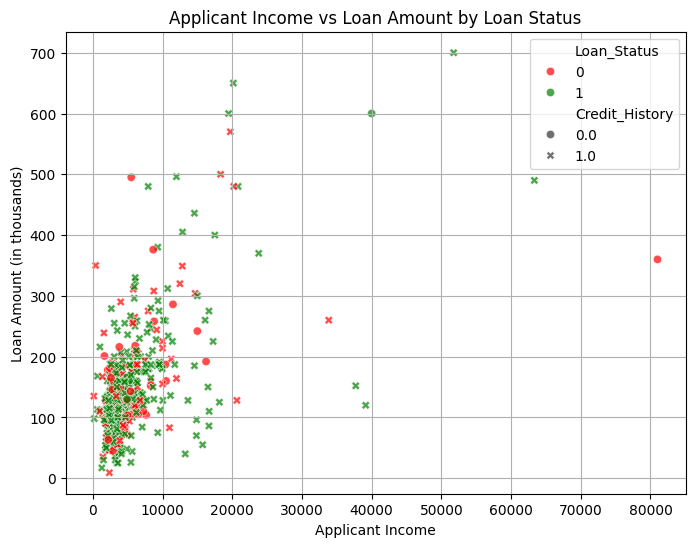

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x='ApplicantIncome', y ='LoanAmount',hue='Loan_Status',
    style='Credit_History',
    palette={1: "green", 0: "red"},  # green for approved, red for rejected
    alpha=0.7
)

plt.title('Applicant Income vs Loan Amount by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount (in thousands)')
plt.grid(True)
plt.show()


## *Heatmap*
### *Its dhows the only data for int, float column

<Axes: >

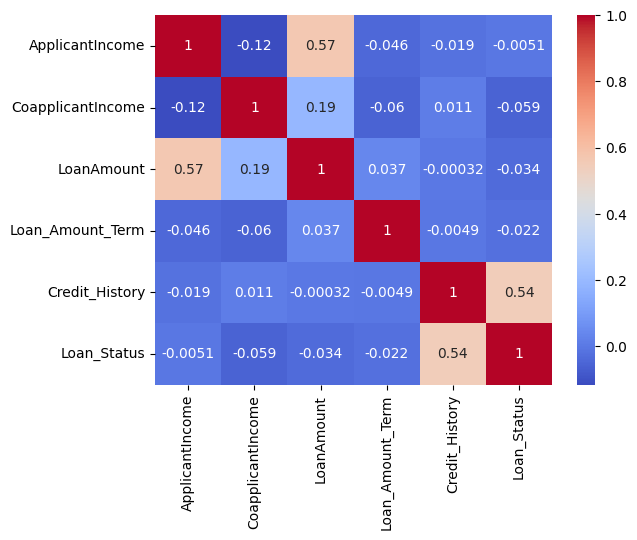

In [20]:
corr = df.select_dtypes(include=[int, float]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

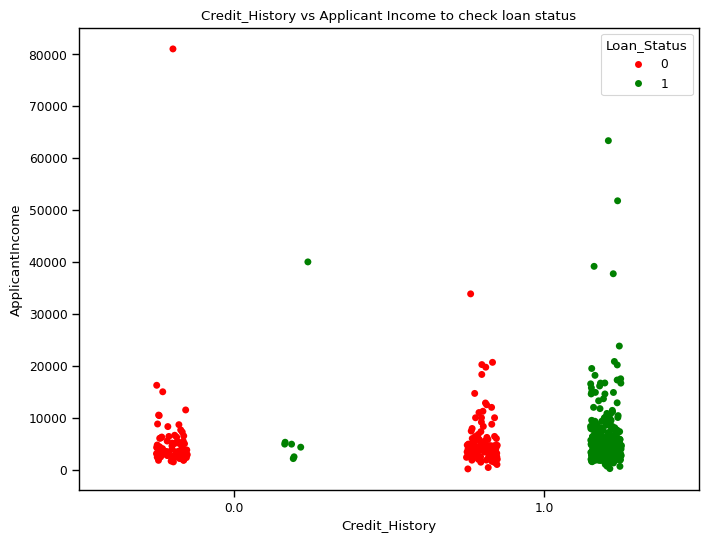

In [21]:
plt.figure(figsize=(8,6))
sns.set_context('paper')
sns.stripplot(data= df,x='Credit_History',y='ApplicantIncome',hue='Loan_Status',palette={1: "green", 0: "red"},dodge=True)
plt.title('Credit_History vs Applicant Income to check loan status')
plt.show()

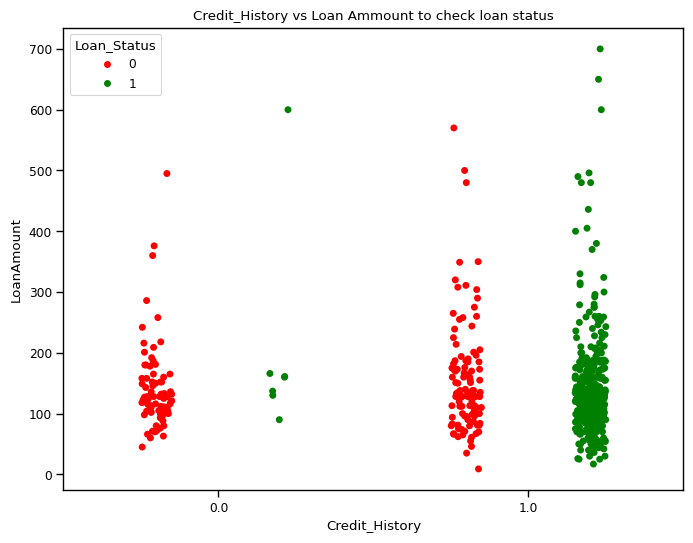

In [22]:
plt.figure(figsize=(8,6))
sns.set_context('paper')
sns.stripplot(data= df,x='Credit_History',y='LoanAmount',hue='Loan_Status',palette={1: "green", 0: "red"},dodge=True)
plt.title('Credit_History vs Loan Ammount to check loan status')
plt.show()

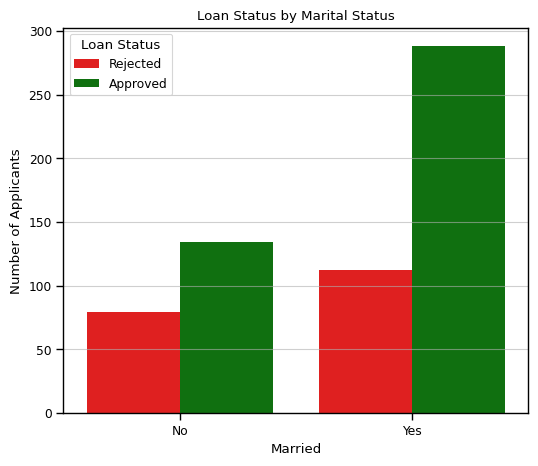

In [23]:
plt.figure(figsize=(6,5))
sns.countplot(
    data=df,
    x='Married',
    hue='Loan_Status',
    palette={1: "green", 0: "red"}
)

plt.title('Loan Status by Marital Status')
plt.xlabel('Married')
plt.ylabel('Number of Applicants')
plt.grid(axis='y', alpha=0.6)
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()


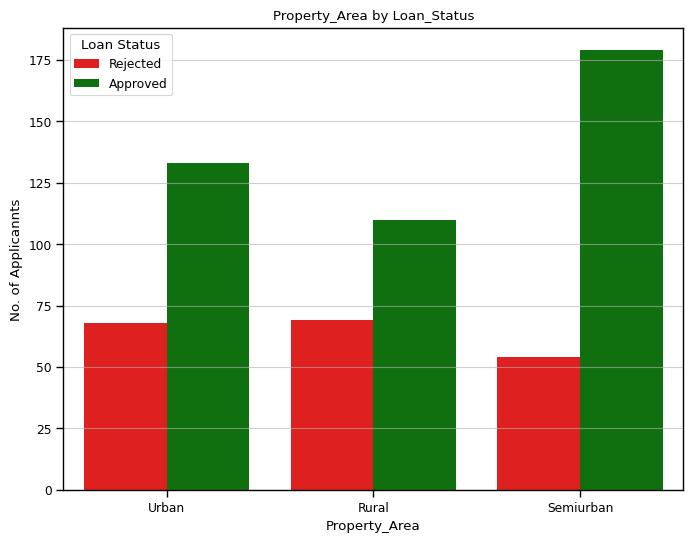

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(data=df , x='Property_Area', hue='Loan_Status', palette={1: "green", 0: "red"})
plt.title('Property_Area by Loan_Status')
plt.ylabel('No. of Applicannts')
plt.grid(axis='y', alpha=0.6)
plt.legend(title='Loan Status',labels=['Rejected','Approved'])
plt.show()

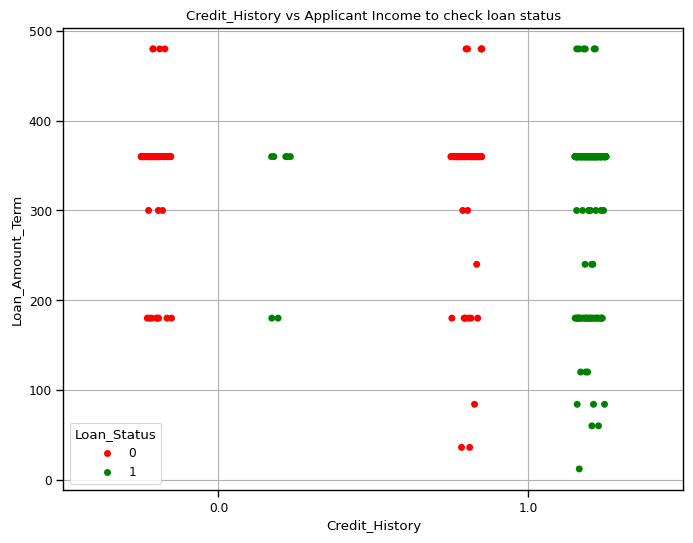

In [25]:
plt.figure(figsize=(8,6))
sns.set_context('paper')
sns.stripplot(data= df,x='Credit_History',y='Loan_Amount_Term',hue='Loan_Status',palette={1: "green", 0: "red"},dodge=True)
plt.title('Credit_History vs Applicant Income to check loan status')
plt.grid(True)
plt.show()

# Finding the outliers
* **Credit_History is clear no outliers**
* **CoapplicantIncome has values that can be realistic and partner can earn model will learn by the data**
* **For Loan_Ammount_Term loan payment time is realistic and model will learn that 12 and 480 months to pay also in option**
* **In LoanAmount min loan price is 9k(if i take it unit k) but it's not improved so it has not error data**
* #### **After exploratory data analysis and outlier inspection, certain values in ApplicantIncome and LoanAmount appeared as statistical outliers. However, upon review data of outliers, these values were found to be realistic and potentially valuable for model learning. So, I don't do any outlier trimming or capping was applied to preserve data originality.**

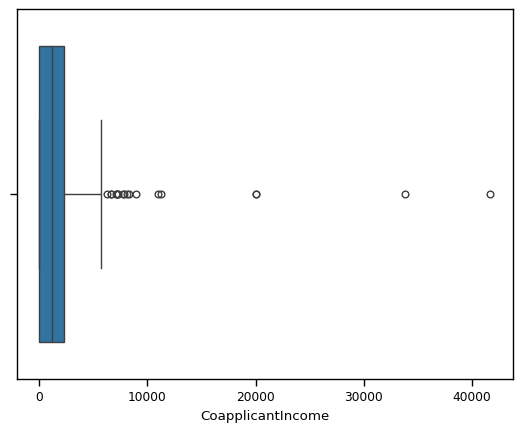

In [26]:
sns.boxplot(x=df['CoapplicantIncome'])
plt.show()

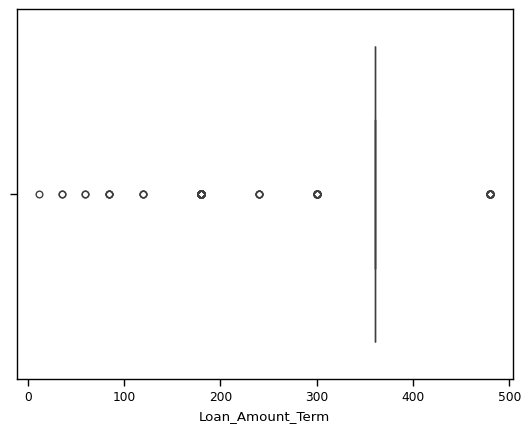

In [27]:
sns.boxplot(x=df['Loan_Amount_Term'])
plt.show()

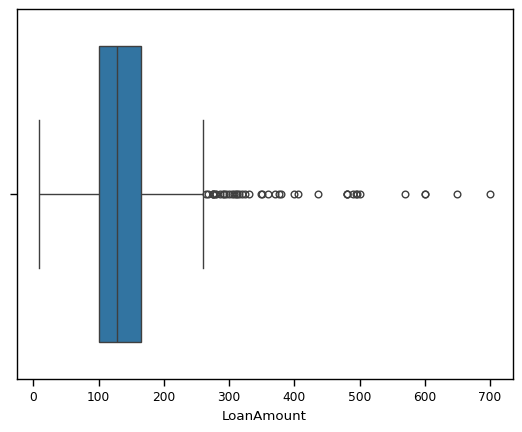

In [28]:
sns.boxplot(x=df['LoanAmount'])
plt.show()

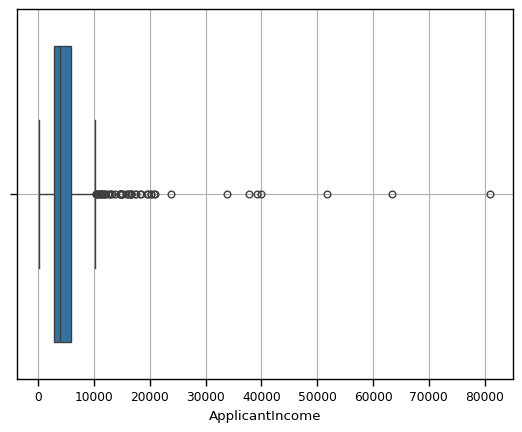

In [29]:
sns.boxplot(x=df['ApplicantIncome'])
plt.grid(True)
plt.show()